In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cufflinks as cf

C:\Users\Rishesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
kol = pd.read_csv('Datasets/Kolkata.csv')

In [3]:
bgl = pd.read_csv('Datasets/bangalore.csv')

In [4]:
pune = pd.read_csv('Datasets/pune.csv')

In [5]:
delhi = pd.read_csv('Datasets/delhi.csv')

In [6]:
hbd = pd.read_csv('Datasets/hyderabad.csv')

In [7]:
chennai = pd.read_csv('Datasets/chennai.csv')

In [8]:
data = pd.concat([kol,bgl,pune,chennai,delhi,hbd],axis = 0)

In [9]:
kol.head()

,Address,City,Degree,Experience,Feedback,Fees,Name,Rating,Specialization
0,"Calcutta Heart Research Centre,Calcutta Heart ...",Kolkata,"MD - (Med. & Thera.), MBBS",47.0,I have visited Dr. Nagori just once yet. He ca...,1000,Dr. S. B. Nagori,5.0,Cardiologist
1,Apollo Gleneagles Hospitals,Kolkata,MBBS,34.0,NaN,1200,Dr. MILAN CHHETRI,4.0,General Physician
2,Fortis Medical Centre,Kolkata,"MBBS, MD - General Medicine",30.0,NaN,1000,Dr. Kumar Kanti Chakravarty,4.0,General Physician
3,Fortis Medical Centre,Kolkata,MBBS,22.0,get satisfactionaly feedback from doctor. Ove...,500,Dr. Suchandra Das,4.0,General Physician
4,Apollo Gleneagles Hospitals,Kolkata,MBBS,28.0,I have a great experience when my son has been...,1200,Dr. HIRAK MAJUMDER,4.0,General Physician


In [10]:
data.dropna(inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15776 entries, 0 to 6150
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         15776 non-null  object 
 1   City            15776 non-null  object 
 2   Degree          15776 non-null  object 
 3   Experience      15776 non-null  float64
 4   Feedback        15776 non-null  object 
 5   Fees            15776 non-null  float64
 6   Name            15776 non-null  object 
 7   Rating          15776 non-null  object 
 8   Specialization  15776 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


In [12]:
kol.head()

,Address,City,Degree,Experience,Feedback,Fees,Name,Rating,Specialization
0,"Calcutta Heart Research Centre,Calcutta Heart ...",Kolkata,"MD - (Med. & Thera.), MBBS",47.0,I have visited Dr. Nagori just once yet. He ca...,1000,Dr. S. B. Nagori,5.0,Cardiologist
1,Apollo Gleneagles Hospitals,Kolkata,MBBS,34.0,NaN,1200,Dr. MILAN CHHETRI,4.0,General Physician
2,Fortis Medical Centre,Kolkata,"MBBS, MD - General Medicine",30.0,NaN,1000,Dr. Kumar Kanti Chakravarty,4.0,General Physician
3,Fortis Medical Centre,Kolkata,MBBS,22.0,get satisfactionaly feedback from doctor. Ove...,500,Dr. Suchandra Das,4.0,General Physician
4,Apollo Gleneagles Hospitals,Kolkata,MBBS,28.0,I have a great experience when my son has been...,1200,Dr. HIRAK MAJUMDER,4.0,General Physician


In [13]:
import re 
def find_sum(str1): 
    temp = list(map(int,re.findall('\d+',str1))) 
    c = 0
    for num in temp:
        if num > 0:
            c = c+1
    if c >0:
        return sum(temp)/c
    else :
        return None
  

In [14]:
data['Rating'] = data['Rating'].astype(str).apply(find_sum)

In [15]:
data['Rating']

0       5.000000
3       4.000000
4       4.000000
5       4.500000
6       3.500000
          ...   
6145    4.000000
6147    4.500000
6148    4.000000
6149    4.000000
6150    4.857143
Name: Rating, Length: 15776, dtype: float64

In [16]:
import nltk
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [18]:
def score_comp(tok):  
    return sid.polarity_scores(tok)['compound']

In [19]:
def score_pos(tok):  
    return sid.polarity_scores(tok)['pos']

In [20]:
def score_neg(tok):  
    return sid.polarity_scores(tok)['neg']

In [21]:
def score_sent_comp(strs):
    tokens = nlp(strs)
    a = []
    for sen in tokens.sents:
        temp = sid.polarity_scores(str(sen))['compound']
        if temp > 0:
            a.append(temp)
    if len(a)>0:
        return sum(a)/len(a)
    else:
        return 0.0

In [22]:
data['Feedback'] = data['Feedback'].astype(str)

In [23]:
data['score_comp'] = data['Feedback'].apply(score_comp)

In [21]:
from spacy.pipeline import SentenceSegmenter
def split_on_newlines(doc):
    start = 0
    seen_newline = False
    for word in doc[:-1]:
        if seen_newline:
            yield doc[start:word.i+1]
            start = word.i+1
            seen_newline = False
        elif ((word.text == '.' or word.text == '!' or word.text == '?') and doc[word.i+1].text == ','):
            seen_newline = True
    yield doc[start:]      # handles the last group of tokens

In [22]:
sbd = SentenceSegmenter(nlp.vocab, strategy=split_on_newlines)
nlp.add_pipe(sbd,before = 'parser')

In [23]:
nlp.pipe_names

['tagger', 'sentencizer_hook', 'parser', 'ner']

In [24]:
data['score_sent_comp'] = data['Feedback'].apply(score_sent_comp)

In [25]:
d = pd.DataFrame(data['Specialization'].value_counts())

In [26]:
d.drop(d[d['Specialization']<=8].index,axis =0, inplace=True )

In [27]:
d.reset_index(inplace = True)

In [28]:
d.drop(['Specialization'], inplace = True, axis = 1)

In [29]:
b = []
for strs in d.itertuples():
    strs = str(strs).lower()
    if re.search('dentist',strs):
        b.append('Dentist')
    elif re.search(r"ayurveda|yoga",strs):
        b.append('Ayurveda')  
    elif re.search(r"gynec|pediatric",strs):
        b.append('Obstetrician')
    elif re.search(r"family|general|internal",strs):
        b.append('General Physician')
    elif re.search(r"ortho|physio|chiropractor",strs):
        b.append('Orthopedic')
    elif re.search(r"dermatologist|ophthalmologist|ear-nose-throat|audio|cosmetologist|speech",strs):
        b.append('Sensory')
    elif re.search(r"homoeopath",strs):   
        b.append('Homeopathy')
    elif re.search(r"radiologist|anesthesiologist|pathologist|hematologist",strs):
        b.append('Others')
    elif re.search(r"surgeon",strs):
        b.append('Surgeon')
    elif re.search("psych",strs):
        b.append('Pychiatrist')
    elif re.search("logist",strs):
        b.append('Internal Medicine')
    else:
        b.append('Others')

In [30]:
b = pd.DataFrame(b,columns = ['Spec'])
d = pd.concat([d,b],axis = 1)
d.rename(columns = {'index':'Specialization'}, inplace=True)
data = pd.merge(data,d,how = 'left',on = 'Specialization')

In [31]:
data = data[(data['City']== 'Kolkata') | (data['City']== 'Bangalore') | (data['City'] == 'Pune') | (data['City'] == 'Chennai') | (data['City'] == 'Hyderabad') | (data['City'] == 'Delhi') ]

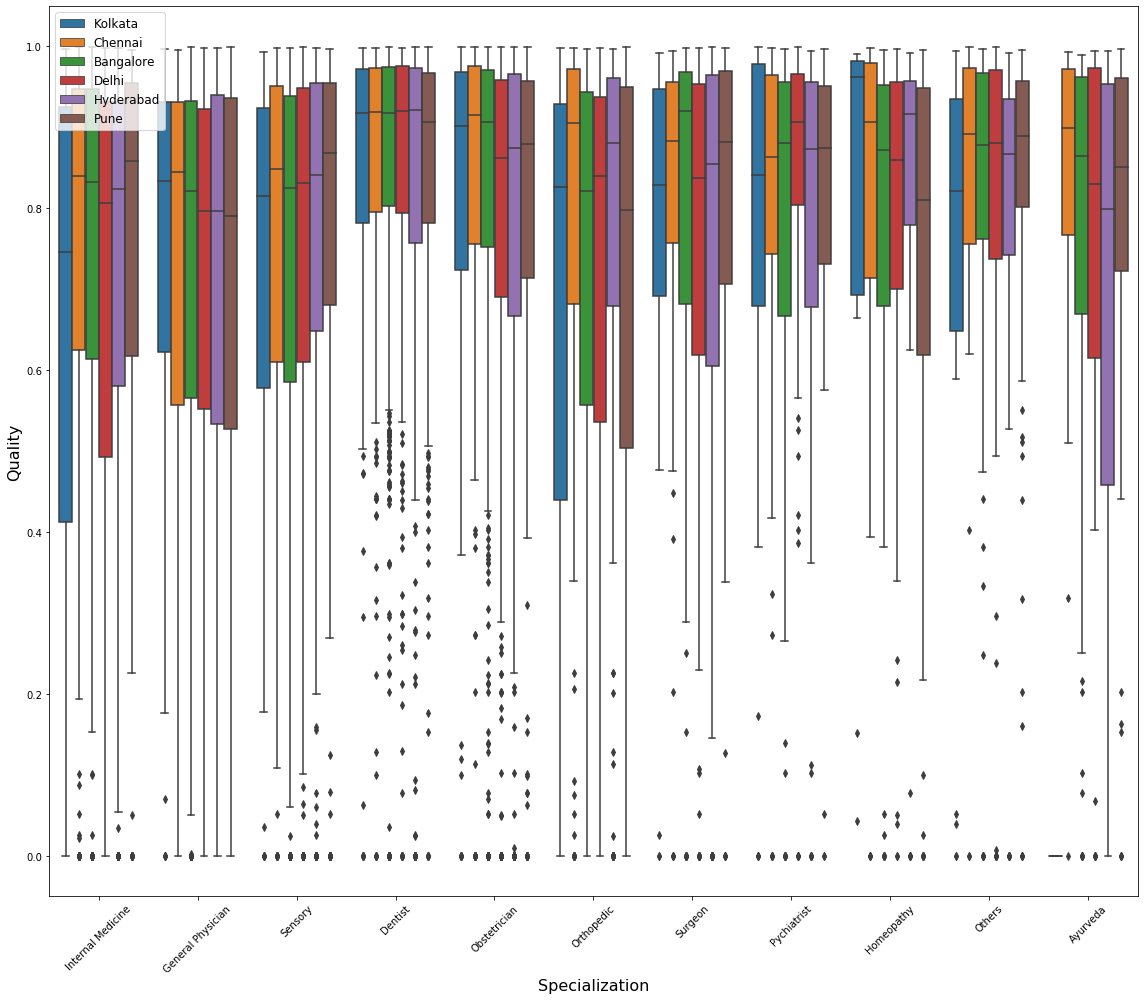

In [32]:
plt.figure(figsize = (16,14))
sns_plot = sns.boxplot(x=data['Spec'],y = data['score_sent_comp'],hue = data['City'])
plt.xlabel('Specialization',fontsize = 16)
plt.ylabel('Quality',fontsize = 16)
plt.rc('xtick',labelsize = 16)
plt.legend(loc = 'upper left',fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
fig = sns_plot.get_figure()
fig.savefig("output.png")

In [33]:
def labels(rate):
    if rate < 4.6:
        return 0
    else:
        return 1

In [34]:
data['Label'] = data['Rating'].apply(labels)

In [35]:
df = data.copy()

In [36]:
import string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [37]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words


In [38]:
def normalizer(string):
    words = nltk.word_tokenize(str(string))
    l1 = normalize(words)
    return l1
def vocabulary_(l1):
    for word in l1:
        if word in list_strings:
            continue
        else:
            list_int.append(len(list_strings))
            list_strings.append(word)

In [39]:
feedback = data['Feedback']

In [40]:
list_strings =[]
list_int = []

for feed in feedback:
    temp = normalizer(feed)
    vocabulary_(temp)

In [41]:
zipObj = zip(list_strings,list_int)
vocabulary = dict(zipObj)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [43]:
tfidf = TfidfVectorizer(vocabulary=vocabulary,max_df = 0.9)

In [44]:
feed_matrix = tfidf.fit_transform(feedback)

In [45]:
X_train = feed_matrix
y_train = data['Label']        

In [46]:
rnd_clf = RandomForestClassifier()

In [47]:
#rnd_clf.fit(X_train,y_train)

In [48]:
from sklearn.model_selection import cross_val_predict

In [49]:
y_scores = cross_val_predict(rnd_clf,X_train,y_train,method = 'predict_proba')
y_scores = y_scores[:, 1]

In [50]:
scores_pd = pd.DataFrame(y_scores, columns = ['feed_score'])
data = pd.merge(data,scores_pd,how = 'right',on = scores_pd.index)
data.drop('key_0',axis=1,inplace=True)

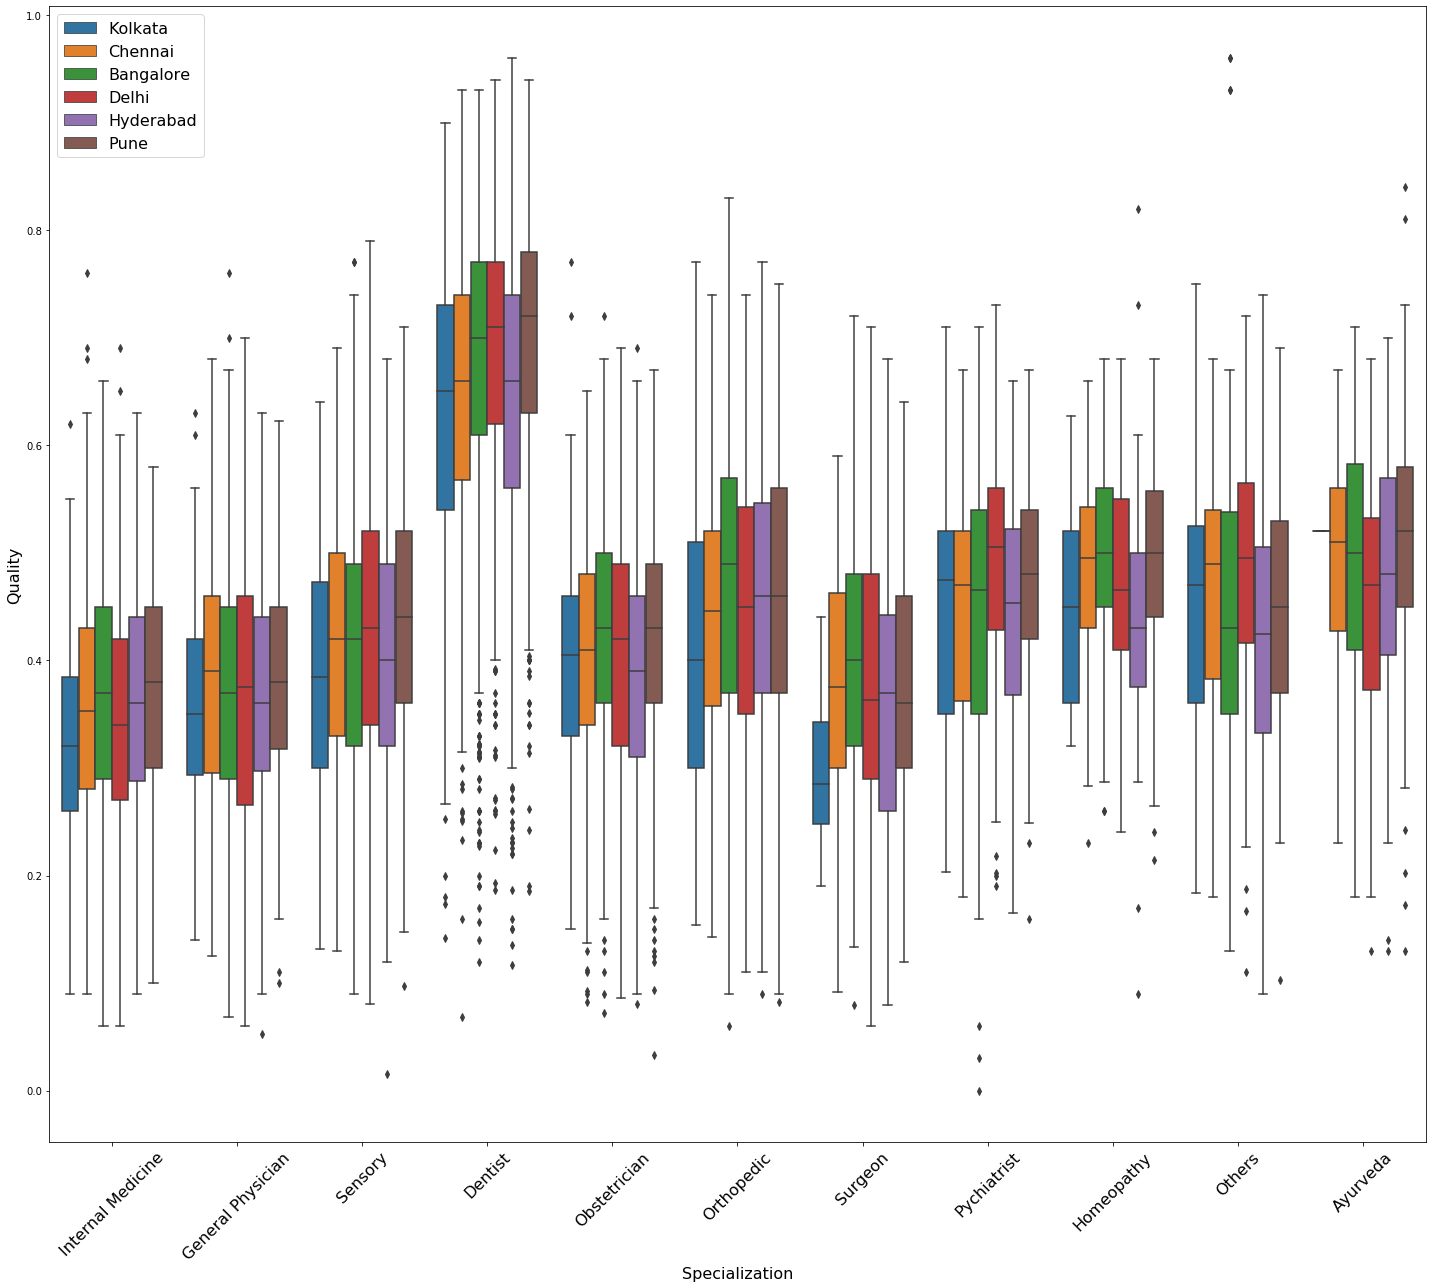

In [52]:
plt.figure(figsize = (20,18))
sns_plot = sns.boxplot(x=data['Spec'],y = data['feed_score'],hue = data['City'])
plt.xlabel('Specialization',fontsize = 16)
plt.ylabel('Quality',fontsize = 16)
plt.rc('xtick',labelsize = 16)
plt.rc('ytick',labelsize = 16)
plt.legend(loc = 'upper left',fontsize = 16)
plt.xticks(rotation = 45)
plt.tight_layout()
fig = sns_plot.get_figure()
fig.savefig("output_1.png")

In [53]:
degrees = data['Degree']

In [54]:
tfidf_deg = TfidfVectorizer(max_df = 0.9)
tfidf_matrix_deg = tfidf_deg.fit_transform(degrees)
X_train_deg = tfidf_matrix_deg

In [55]:
from scipy.sparse import coo_matrix, hstack

In [58]:
A = coo_matrix(feed_matrix)
B = coo_matrix(tfidf_matrix_deg)
features = hstack([A,B]).toarray()

In [59]:
#rnd_clf.fit(features,y_train)

In [60]:
y_scores = cross_val_predict(rnd_clf,features,y_train,method = 'predict_proba')
y_scores = y_scores[:, 1]

In [61]:
scores_pd = pd.DataFrame(y_scores, columns = ['feed_deg_score'])
data = pd.merge(data,scores_pd,how = 'right',on = scores_pd.index)
data.drop('key_0',axis=1,inplace=True)

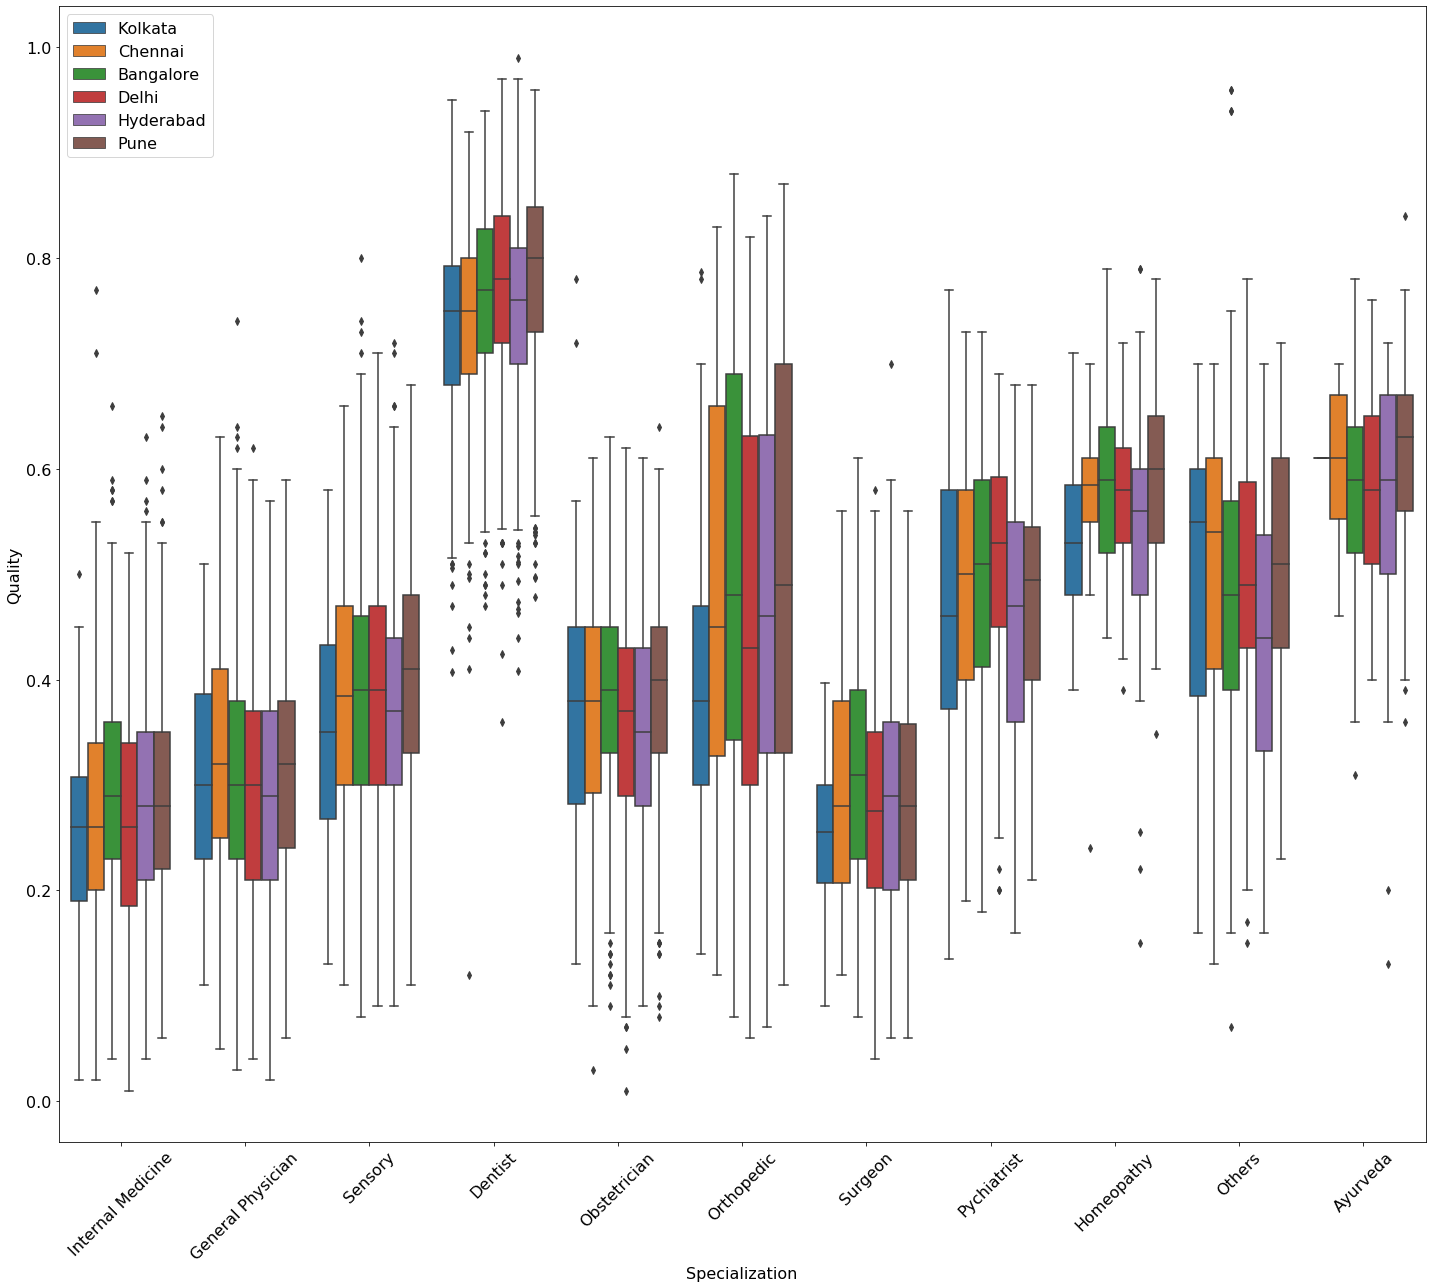

In [62]:
plt.figure(figsize = (20,18))
sns_plot = sns.boxplot(x=data['Spec'],y = data['feed_deg_score'],hue = data['City'])
plt.xlabel('Specialization',fontsize = 16)
plt.ylabel('Quality',fontsize = 16)
plt.rc('xtick',labelsize = 16)
plt.rc('ytick',labelsize = 16)
plt.legend(loc = 'upper left',fontsize = 16)
plt.xticks(rotation = 45)
plt.tight_layout()
fig = sns_plot.get_figure()
fig.savefig("output_2.png")

In [63]:
data['rate_exp'] = (data['Rating']/data['Experience']*100)

In [64]:
def labels_2(rate):
    if rate < 30:
        return 0
    else:
        return 1
data['Label_2'] = data['rate_exp'].apply(labels_2)

In [65]:
y_train_2 = data['Label_2']

In [66]:
#rnd_clf.fit(features,y_train_2)

In [67]:
y_scores = cross_val_predict(rnd_clf,features,y_train_2,method = 'predict_proba')
y_scores = y_scores[:, 1]

In [68]:
scores_pd = pd.DataFrame(y_scores, columns = ['feed_deg_score_exp'])
data = pd.merge(data,scores_pd,how = 'right',on = scores_pd.index)
data.drop('key_0',axis=1,inplace=True)

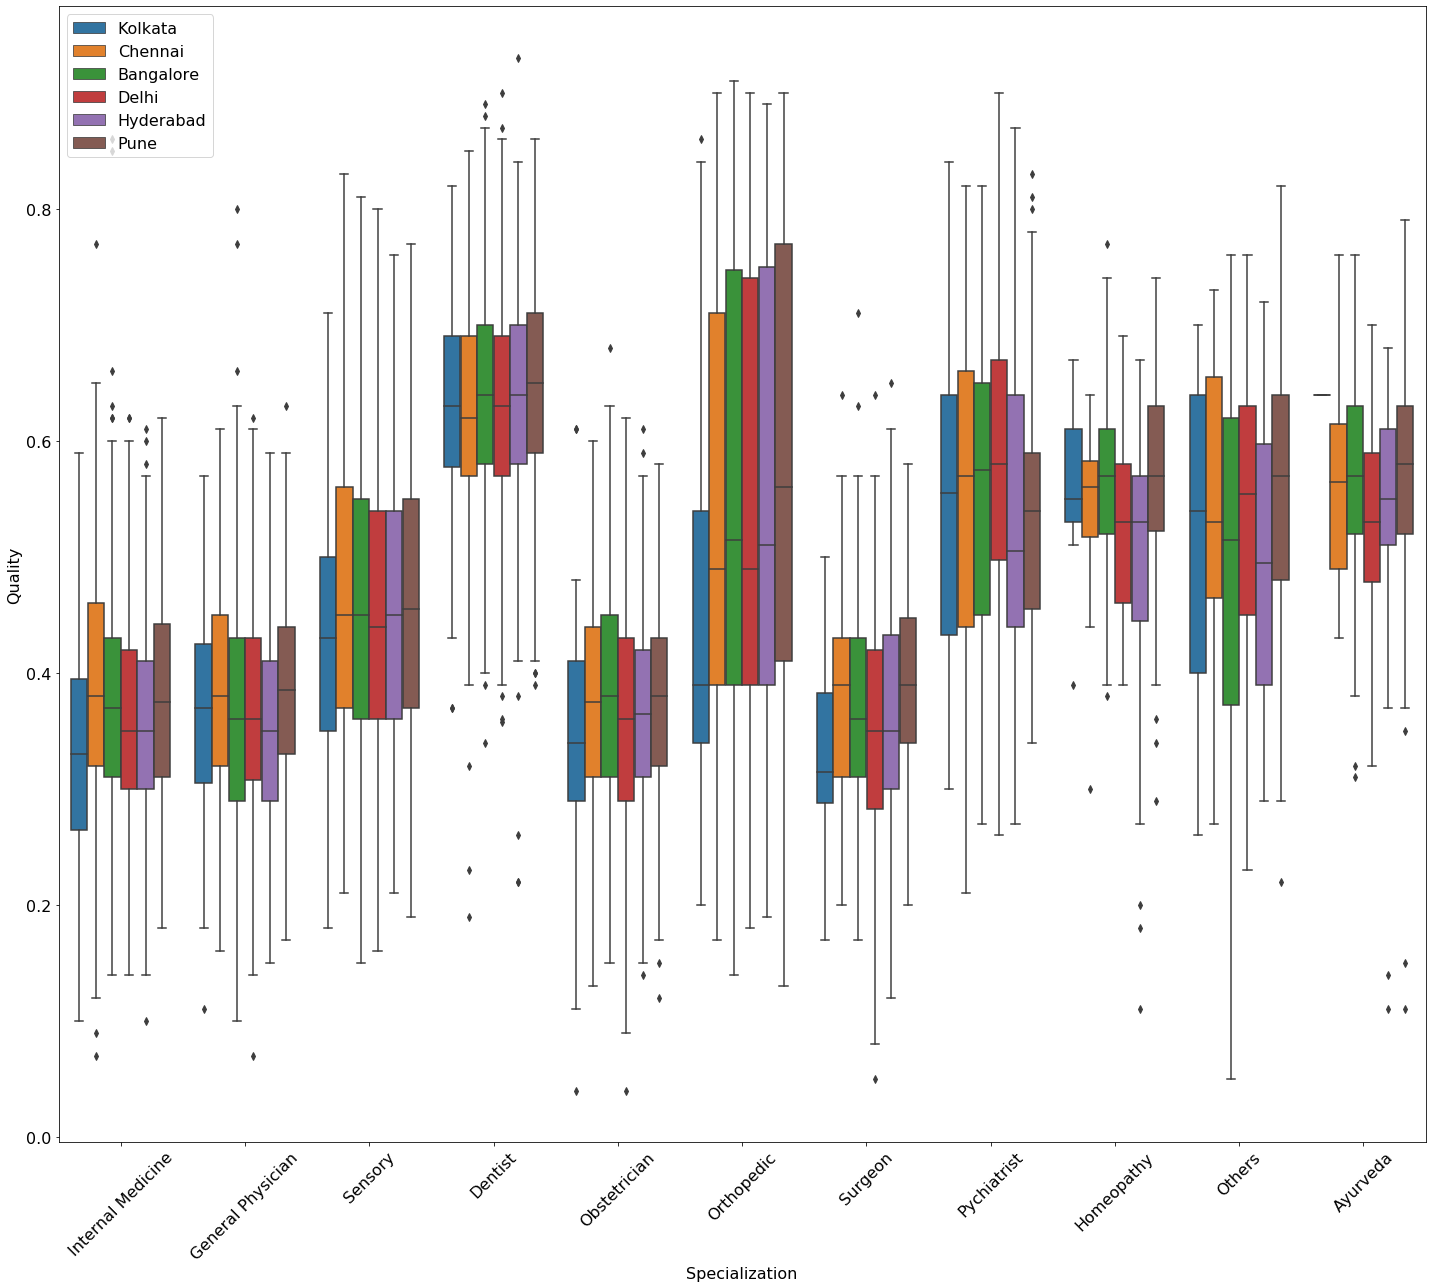

In [69]:
plt.figure(figsize = (20,18))
sns_plot = sns.boxplot(x=data['Spec'],y = data['feed_deg_score_exp'],hue = data['City'])
plt.xlabel('Specialization',fontsize = 16)
plt.ylabel('Quality',fontsize = 16)
plt.rc('xtick',labelsize = 16)
plt.rc('ytick',labelsize = 16)
plt.legend(loc = 'upper left',fontsize = 16)
plt.xticks(rotation = 45)
plt.tight_layout()
fig = sns_plot.get_figure()
fig.savefig("output_3.png")

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [71]:
exp = data['Experience'].to_numpy().reshape(-1,1)

In [72]:
exp = scaler.fit_transform(exp)

In [73]:
C = coo_matrix(exp)
features = hstack([A,B,C]).toarray()

In [74]:
y_scores = cross_val_predict(rnd_clf,features,y_train,method = 'predict_proba',cv = 3)
y_scores = y_scores[:, 1]

In [77]:
scores_pd = pd.DataFrame(y_scores, columns = ['feed_deg_exp_score'])
data = pd.merge(data,scores_pd,how = 'right',on = scores_pd.index)
data.drop('key_0',axis=1,inplace=True)

In [78]:
data

,Address,City,Degree,Experience,Feedback,Fees,Name,Rating,Specialization,score_comp,score_sent_comp,Spec,Label,feed_score,feed_deg_score,rate_exp,Label_2,feed_deg_score_exp,feed_deg_exp_score
0,"Calcutta Heart Research Centre,Calcutta Heart ...",Kolkata,"MD - (Med. & Thera.), MBBS",47.0,I have visited Dr. Nagori just once yet. He ca...,1000.0,Dr. S. B. Nagori,5.000000,Cardiologist,0.9741,0.666850,Internal Medicine,1,0.420000,0.50,10.638298,0,0.590000,0.41
1,Fortis Medical Centre,Kolkata,MBBS,22.0,get satisfactionaly feedback from doctor. Ove...,500.0,Dr. Suchandra Das,4.000000,General Physician,0.6369,0.636900,General Physician,0,0.230750,0.23,18.181818,0,0.253333,0.16
2,Apollo Gleneagles Hospitals,Kolkata,MBBS,28.0,I have a great experience when my son has been...,1200.0,Dr. HIRAK MAJUMDER,4.000000,General Physician,-0.5994,0.000000,General Physician,0,0.270000,0.26,14.285714,0,0.320000,0.26
3,AMRI Hospitals,Kolkata,"MBBS, FCPS - Medicine",10.0,"Dear Dr. Vishal,We had visited to Dr Vishal fo...",600.0,Dr. Shambhu Vishal,4.500000,General Physician,0.9062,0.906200,General Physician,0,0.330000,0.30,45.000000,1,0.370000,0.37
4,"Apollo Gleneagles Cancer Hospital,Apollo Glene...",Kolkata,"MBBS, MD - Medicine, MRCP (UK)",23.0,Dr. A. R. Choudhury is very polite and caring ...,600.0,Dr. Sushmita Roy Chowdhury,3.500000,Internal Medicine,0.7755,0.775500,General Physician,0,0.350000,0.29,15.217391,0,0.290000,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,DHI,Delhi,"MBBS, MD - Dermatology , Venereology & Leprosy",15.0,My previous hair consultations at other clinic...,1000.0,Dr. Kuntal Deb Barma,4.000000,Hair Transplant Surgeon,0.7445,0.452633,Surgeon,0,0.260000,0.36,26.666667,0,0.500000,0.34
15476,Aster CMI Hospital,Bangalore,"MBBS, Graduate Certificate of Paediatric Rheum...",6.0,My son had hsp in dec 2018. We have had his co...,800.0,Dr. Sagar Bhattad,4.500000,Rheumatologist,0.9794,0.924000,Internal Medicine,0,0.180000,0.22,75.000000,1,0.850000,0.20
15477,Woodlands Hospital,Hyderabad,"MBBS, MD - Medicine, DM - Gastroenterology",27.0,Op costly,500.0,Dr. Ramesh Kumar,4.000000,Gastroenterologist,-0.1027,0.000000,Internal Medicine,0,0.232118,0.10,14.814815,0,0.170000,0.06
15478,Care Hospitals,Hyderabad,"MBBS, DNB - General Medicine, DM - Cardiology",37.0,He is the most genuine and kindest Dr / Human...,450.0,Dr. C. Narasimhan,4.000000,Cardiologist,0.9928,0.992800,Internal Medicine,0,0.370000,0.16,10.810811,0,0.220000,0.22


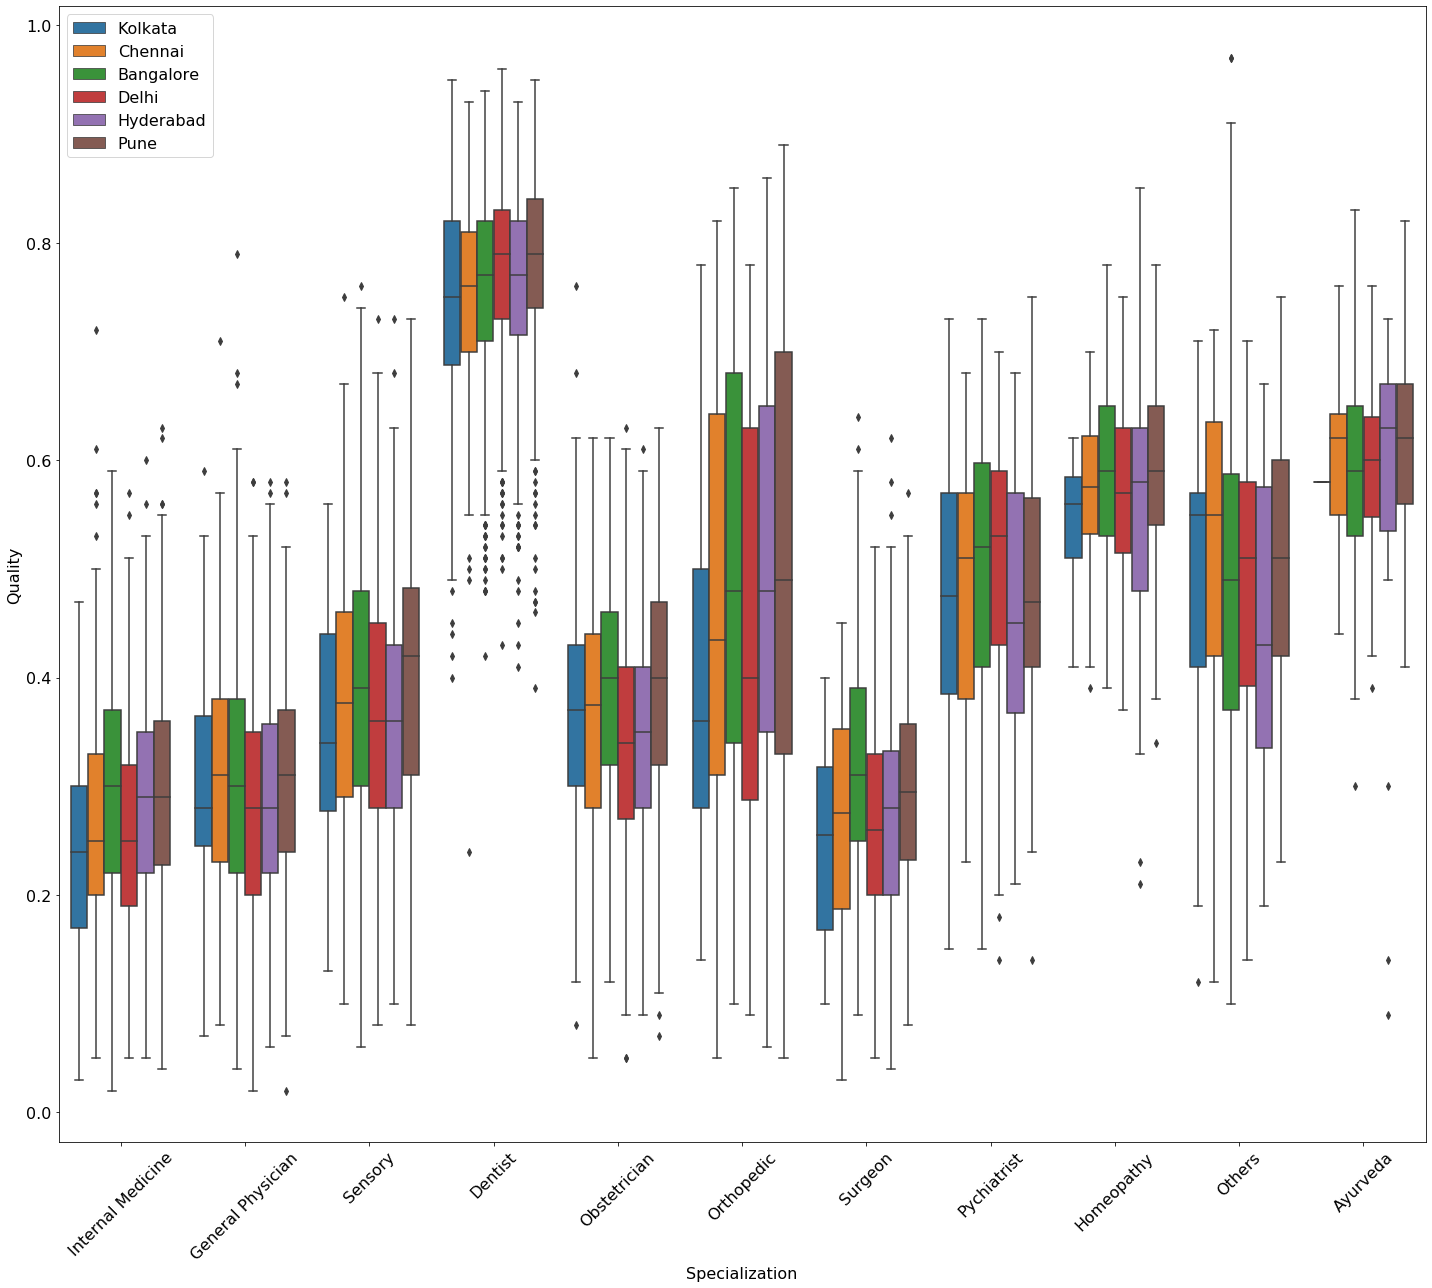

In [79]:
plt.figure(figsize = (20,18))
sns_plot = sns.boxplot(x=data['Spec'],y = data['feed_deg_exp_score'],hue = data['City'])
plt.xlabel('Specialization',fontsize = 16)
plt.ylabel('Quality',fontsize = 16)
plt.rc('xtick',labelsize = 16)
plt.rc('ytick',labelsize = 16)
plt.legend(loc = 'upper left',fontsize = 16)
plt.xticks(rotation = 45)
plt.tight_layout()
fig = sns_plot.get_figure()
fig.savefig("output_4.png")

In [80]:
data.describe()

,Experience,Fees,Rating,score_comp,score_sent_comp,Label,feed_score,feed_deg_score,rate_exp,Label_2,feed_deg_score_exp,feed_deg_exp_score
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,17.902196,528.422028,4.591462,0.746446,0.761455,0.478488,0.468369,0.471602,36.638801,0.481395,0.481043,0.469788
std,9.751363,346.255456,0.442716,0.468195,0.279456,0.499553,0.165935,0.209899,32.749688,0.499670,0.157329,0.212100
min,1.000000,1.000000,3.000000,-0.998900,0.000000,0.000000,0.000000,0.010000,5.555556,0.000000,0.040000,0.020000
25%,11.000000,300.000000,4.000000,0.800800,0.679237,0.000000,0.350000,0.300000,19.565217,0.000000,0.360000,0.300000
50%,16.000000,500.000000,4.500000,0.955200,0.874125,0.000000,0.450000,0.430000,28.888889,0.000000,0.460000,0.420000
75%,23.000000,600.000000,5.000000,0.984400,0.959000,1.000000,0.570000,0.650000,45.000000,1.000000,0.600000,0.650000
max,67.000000,6000.000000,5.000000,0.999700,0.999300,1.000000,0.960000,0.990000,500.000000,1.000000,0.930000,0.970000


In [81]:
data[data['rate_exp']>100]

,Address,City,Degree,Experience,Feedback,Fees,Name,Rating,Specialization,score_comp,score_sent_comp,Spec,Label,feed_score,feed_deg_score,rate_exp,Label_2,feed_deg_score_exp,feed_deg_exp_score
78,Amazing Smiles,Kolkata,BDS,3.0,I had a nice experience with the doctor. She w...,300.0,Dr. Radhika Sarawgi,5.0,Dentist,0.9779,0.977900,Dentist,1,0.470000,0.6200,166.666667,1,0.630,0.67
109,Body N Mind Cafe,Kolkata,MSc - Applied Psychology,4.0,Sumedh is a wonderful mentor in leading your p...,1000.0,Mr. Sumedh Chatterjee,4.5,Psychologist,0.9974,0.997400,Pychiatrist,0,0.490000,0.6300,112.500000,1,0.650,0.57
179,"Diet2Fit,Diet2fit,Diet 2 Fit,Diet 2 Fit",Kolkata,"Diploma in Dietetics, Health and Nutrition (DDHN)",3.0,I highly recommend her I lost 9 kg in month a ...,1500.0,Ms. Chetu singhi,5.0,Dietitian/nutritionist,0.9898,0.837433,Others,1,0.690000,0.5800,166.666667,1,0.580,0.61
220,"Seema Poddar's Diet Clinic,Seema Poddar Chamber",Kolkata,"Diploma in Dietetics, Health and Nutrition (DDHN)",4.0,I an 40+ and undergoing hormonal change due to...,1500.0,Ms. Seema Poddar,5.0,Dietitian/nutritionist,0.9350,0.932150,Others,1,0.600000,0.6500,125.000000,1,0.670,0.62
222,Gajanan Clinic,Kolkata,BDS,3.0,Very good. My teeth very well. Doctor is very ...,500.0,Dr. Nikki Saraogi,5.0,Dentist,0.8871,0.887100,Dentist,1,0.726667,0.7700,166.666667,1,0.705,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15468,Progressive Care,Hyderabad,Diploma In Naturopathy (ND),1.0,Nice doctor friendly nature explaining everyth...,500.0,Ms. Neelima Rani S,5.0,Yoga And Naturopathy,0.7184,0.718400,Ayurveda,1,0.360000,0.3600,500.000000,1,0.550,0.55
15470,Apollo Life Studio,Hyderabad,BPTh/BPT,4.0,Dr Mamatha(PT) is an exclusive doctor she made...,800.0,Dr. Mamatha (Physiotherapist),5.0,Physiotherapist,0.9011,0.901100,Orthopedic,1,0.334286,0.5700,125.000000,1,0.700,0.64
15471,Apollo Life Studio,Hyderabad,BPTh/BPT,4.0,Dr.sowjanya is very patient and friendly. she ...,800.0,Dr. Sowjanya (Physiotherapist),5.0,Physiotherapist,0.8207,0.820700,Orthopedic,1,0.413429,0.6300,125.000000,1,0.800,0.72
15472,Apollo Life Studio,Hyderabad,"BPTh/BPT, MPTh/MPT - Paediatric Physiotherapy",4.0,She is a very capable and friendly professiona...,800.0,Dr. Gowthami (Physiotherapist),5.0,Physiotherapist,0.9659,0.794600,Orthopedic,1,0.600000,0.7500,125.000000,1,0.830,0.69


In [90]:
data.iloc[546]

Address                        Future Healthcare And Diagnostics Centre
City                                                            Kolkata
Degree                                      MBBS, Diploma in Cardiology
Experience                                                           29
Feedback              He is a very good doctor. Gave us enough time ...
Fees                                                                500
Name                                                    Dr. Tapan Sinha
Rating                                                              4.5
Specialization                                             Cardiologist
score_comp                                                       0.9537
score_sent_comp                                                 0.83805
Spec                                                  Internal Medicine
Label                                                                 0
feed_score                                                      

In [92]:
data['Feedback'][546]

'He is a very good doctor. Gave us enough time to listen all our queries and responded well. This is 1st day feedback. My father have minor stroke for high blood pressure and he told that ot will take 2 minth to recover 90%. Lets hope for the best. Tahanknyou doc. ,Good doctor with very nice behaviour soft spoken. Very nice in explaining the problem and there solutions'